<a href="https://colab.research.google.com/github/GabrielaGSecolo/Analise-de-movimentos-da-mao-utilizando-EMG-de-alta-densidade/blob/main/An%C3%A1lise_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link para acessar o artigo:

https://www.nature.com/articles/s41597-021-00843-9

Link para acessar a tabela de movimentos:

https://www.nature.com/articles/s41597-021-00843-9/tables/2

Link dos dados dos sujeitos: https://springernature.figshare.com/collections/A_database_of_high-density_surface_electromyogram_signals_comprising_65_hand_gestures_performed_in_an_isometric_manner/5090861


Legenda dos dados:

Força 0 - dedo 2 (indicador)

Força 1 - dedo 3 (do meio)

Força 2 - dedo 4 (anelar)

Força 3 - dedo 5 (mindinho)

Força 4 - Flexão e extensão do dedo 1 (polegar)

Força 5 - Abdução(pra fora) e adução(pra dentro) do polegar

Força 6 - Flexão e extensão do punho

Força 7 - supinação e pronação do punho

Força 8 - Desvio radial e ulnar

obs: pra fora e pra detro é em relação a posição antomica (palma da mão virada pra cima)

link de cada sujeito:


* Suj01: https://springernature.figshare.com/ndownloader/files/25295225
* Suj02: https://springernature.figshare.com/ndownloader/files/25295423
* Suj03: https://springernature.figshare.com/ndownloader/files/25296089
* Suj04: https://springernature.figshare.com/ndownloader/files/25296368
* Suj05: https://springernature.figshare.com/ndownloader/files/25308197
* Suj06: https://springernature.figshare.com/ndownloader/files/25296644
* Suj07: https://springernature.figshare.com/ndownloader/files/25296788
* Suj08: https://springernature.figshare.com/ndownloader/files/25309355
* Suj09: https://springernature.figshare.com/ndownloader/files/25312253
* Suj10: https://springernature.figshare.com/ndownloader/files/25313726
* Suj11: https://springernature.figshare.com/ndownloader/files/25313324
* Suj12: https://springernature.figshare.com/ndownloader/files/25312382
* Suj13: https://springernature.figshare.com/ndownloader/files/25313078
* Suj14: https://springernature.figshare.com/ndownloader/files/25313597
* Suj15: https://springernature.figshare.com/ndownloader/files/25323104
* Suj16: https://springernature.figshare.com/ndownloader/files/25323134
* Suj17: https://springernature.figshare.com/ndownloader/files/25323215
* Suj18: https://springernature.figshare.com/ndownloader/files/25323065
* Suj19: https://springernature.figshare.com/ndownloader/files/25323257
* Suj20: https://springernature.figshare.com/ndownloader/files/24350114


**Permitindo acesso ao drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Função para gerar os gráficos**

In [ ]:
def forcaxmovimento(f):
  forca= []
  F = dict()
  
  for m in range(1,np.max(a)+1): #m vai percorrer os 65 movimentos
    #obs: np.max(a)=65, aí coloca o +1, fica 66 e o range vai ate 65
    i = 0
    j = 0

    
    plt.figure() #o plt.figure aqui e o plt.show no final de tudo faz com que forme um único gráfico com as 5 retas que representam as 5 repetições 
    plt.ylabel("Força(N)")
    plt.xlabel("Tempo(s)")
    while i < len(a):  #enquanto i for menor que 66(tamanho do a) vai acontecer o que tá aqui embaixo: 
    

      if a[i]==m: #se a for igual ao movimento que eu escolhi no input: 
        plt.title("Movimento"+str(m))
        forca = []
        while a[i] == m: #enquanto a for igual ao movimento que eu escolhi no input, que tem 5s de repetição 
          forca_volts= file.root.force [f,i] 

          forca_newtons= (forca_volts*40)-100
          forca.append(forca_newtons) #juntou um por um ---> o append
          i = i + 1
      #o que está acontecendo nesse while: fixou a==6, por exemplo, então vou analisar as 5 forças(dos 5 dedos) enquanto estiver fazendo o movimento 6
      #vou fazer o gráfico das 5 repetições do mesmo movimento
        t=np.arange(len(forca))/2048 #transformou o tempo em segundos
        plt.plot(t,forca)
      
        F[j,m] = forca #guarda todas as forças e o movimento no dicionário F
        j = j + 1 #onde vai ser guardado a força dentro do dict F 
      else:
        i = i + 1 #pula pro próximo movimento 
    plt.grid()
    plt.show() 
  return F

**Código pra gerar as tabelas media/desvio padrão dos sujeitos**

In [ ]:
!pip install wget
import pickle #importar a biblioteca pickle
import wget
import tables
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
 
for i in range(0,20):
    subject_number = str(i + 1)
  #fazendo as tabelas
    for forca in range(0,9): #selecionando os 9 arquivos
        print(forca)
        infile= open('/content/drive/MyDrive/PDPD/Suj'+subject_number+'_F'+str(forca)+'.pkl','rb')  
        new_dict = pickle.load(infile)
        infile.close()
      # #criando dicionário para salvar repetições  
        media = dict()
        dp = dict()
      #repetições do movimento 
        keys = list(new_dict.keys())
        
        for p in range(0,5):
        #média e desvio padrão repetições 
            media[p]=np.zeros(65) #faz um vetor com 65 zeros = cria um vetor de 65 elementos para gravar coisas no caso a media e o desvio padrao aqui dentro 
            dp[p]=np.zeros(65)    

        for j in range(1,66):#percorrer os 65 movimentos
            maior_chave = 0
            for m in range(len(new_dict)):
                if keys[m][0] > maior_chave and keys[m][1]==j:
                    maior_chave = keys[m][0]
        
        
            for p in range(0,min(5,maior_chave+1)):
        #média e desvio padrão repetições 
        
                media[p][j-1]=np.array(new_dict[p,j]).mean() #o [i-1] foi pra ir gravando no 'np.zeros' e formar o vetor com as medias 
                dp[p][j-1]=np.array(new_dict[p,j]).std()

        
        
        tabela_media_dp = {'Média 1': media[0], 'Média 2': media[1], 'Média 3': media[2], 'Média 4': media[3], 'Média 5': media[4],
                        'Desvio Padrão 1': dp[0], 'Desvio Padrão 2': dp[1], 'Desvio Padrão 3': dp[2], 'Desvio Padrão 4': dp[3], 'Desvio Padrão 5': dp[4]}
        df=pd.DataFrame(tabela_media_dp)

        df.to_csv('/content/drive/MyDrive/PDPD/Suj'+subject_number+'_Tabela_Média_DP'+str(forca)+'_teste.csv')

        display(df)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
0


,Média 1,Média 2,Média 3,Média 4,Média 5,Desvio Padrão 1,Desvio Padrão 2,Desvio Padrão 3,Desvio Padrão 4,Desvio Padrão 5
0,0.007333,-0.022501,-0.011234,-0.047448,-0.040624,0.020864,0.022367,0.016487,0.026649,0.026324
1,-0.044828,-0.071458,-0.062336,-0.077587,-0.087325,0.025533,0.025736,0.022675,0.023089,0.014931
2,0.018488,-0.018443,0.026422,0.103552,0.088386,0.018763,0.022203,0.028975,0.027461,0.043542
3,-0.007324,-0.004199,0.009140,0.003028,-0.000996,0.025973,0.023104,0.021766,0.018269,0.018859
4,-0.045930,-0.040247,-0.005828,-0.003985,-0.002911,0.037479,0.033478,0.027016,0.023364,0.034723
...,...,...,...,...,...,...,...,...,...,...
60,-2.478206,-3.011696,-3.409446,-4.036674,-3.600824,0.438134,0.438656,0.641909,0.619548,0.453010
61,2.660270,2.528424,3.951065,3.372898,4.283238,0.627306,0.760952,0.785053,0.393512,0.759691
62,-1.609777,-2.090481,-2.589806,-3.050443,-2.015081,0.408714,0.218397,0.236310,0.287664,0.226669
63,-2.520168,-4.485413,-3.361896,-3.504747,-5.324507,0.775452,0.556794,0.508510,0.424640,1.004735


1


,Média 1,Média 2,Média 3,Média 4,Média 5,Desvio Padrão 1,Desvio Padrão 2,Desvio Padrão 3,Desvio Padrão 4,Desvio Padrão 5
0,-2.208269,-2.230307,-2.242281,-2.227970,-2.246384,0.041766,0.045213,0.053236,0.055945,0.055102
1,-2.278461,-2.303134,-2.335418,-2.342465,-2.365565,0.040370,0.048595,0.057977,0.041515,0.048430
2,-2.587526,-2.599034,-2.610597,-2.635635,-2.537770,0.106109,0.064832,0.072858,0.048600,0.241146
3,-2.032409,-2.048088,-1.979307,-2.037644,-2.015095,0.061343,0.051179,0.074177,0.086222,0.065641
4,-4.769354,-5.310993,-5.610556,-5.306511,-4.822531,0.246074,0.298079,0.387993,0.314752,0.270963
...,...,...,...,...,...,...,...,...,...,...
60,-2.582916,-2.570368,-2.732858,-2.781895,-2.958261,0.060519,0.049766,0.167594,0.106531,0.255221
61,-3.905592,-2.947102,-4.619879,-5.234985,-4.653588,0.611106,0.444021,0.819212,0.643343,0.825163
62,-5.434051,-4.367560,-4.527694,-5.030355,-5.080758,0.601508,0.410991,0.199498,0.365677,0.231486
63,-4.107234,-3.543515,-4.447748,-4.589395,-4.730503,0.310894,0.286037,0.442122,0.125319,0.443254


2


,Média 1,Média 2,Média 3,Média 4,Média 5,Desvio Padrão 1,Desvio Padrão 2,Desvio Padrão 3,Desvio Padrão 4,Desvio Padrão 5
0,0.064711,0.072376,0.067836,0.051066,0.063046,0.012600,0.015406,0.015233,0.038605,0.011963
1,-0.018919,-0.052990,-0.053392,-0.046442,-0.025505,0.032812,0.020090,0.025927,0.020451,0.021734
2,-2.915220,-3.071638,-2.986262,-3.442540,-2.689302,0.395304,0.285998,0.260209,0.313242,0.693810
3,0.476605,0.445913,0.612859,0.353214,0.378019,0.306810,0.075908,0.143726,0.100083,0.099543
4,-0.203034,-0.184041,-0.202828,-0.154818,-0.130143,0.043606,0.041951,0.029763,0.031864,0.035615
...,...,...,...,...,...,...,...,...,...,...
60,-0.266606,-0.269319,-0.292579,-0.274227,-0.242551,0.031139,0.035499,0.053001,0.036550,0.057373
61,-0.534131,-0.414444,-1.155050,-0.771360,-0.777474,0.099311,0.233937,0.392895,0.453445,0.158556
62,0.132813,0.073326,-0.038339,0.050632,0.085051,0.087648,0.066991,0.022583,0.022135,0.029607
63,0.392428,0.364920,0.282172,0.298344,0.161361,0.040900,0.052948,0.029091,0.060143,0.040510


3


,Média 1,Média 2,Média 3,Média 4,Média 5,Desvio Padrão 1,Desvio Padrão 2,Desvio Padrão 3,Desvio Padrão 4,Desvio Padrão 5
0,-3.252919,-3.017859,-3.083510,-3.213601,-3.198131,0.150868,0.064063,0.073406,0.066848,0.073802
1,-1.809356,-1.645150,-1.572883,-1.512274,-1.987338,0.073450,0.082647,0.077131,0.129318,0.048512
2,-2.135805,-2.295195,-2.261086,-2.302971,-2.197112,0.033649,0.048818,0.031789,0.063692,0.037006
3,-2.195058,-2.207128,-2.149044,-2.182200,-2.160486,0.035260,0.034652,0.047665,0.045055,0.025426
4,-2.111064,-2.096728,-2.109900,-2.073948,-2.122197,0.022764,0.028785,0.025709,0.032924,0.021262
...,...,...,...,...,...,...,...,...,...,...
60,-3.029459,-3.188320,-3.180417,-3.158122,-3.018043,0.113223,0.129525,0.105318,0.124708,0.073407
61,-2.761034,-2.722283,-2.857116,-2.537881,-2.829811,0.060978,0.066758,0.269007,0.190527,0.196061
62,-2.164022,-2.143034,-2.230735,-2.178772,-2.140608,0.047291,0.022189,0.021876,0.042153,0.022714
63,-2.071593,-2.125341,-2.055542,-2.022079,-2.146776,0.044821,0.055149,0.024586,0.030339,0.021369


4


,Média 1,Média 2,Média 3,Média 4,Média 5,Desvio Padrão 1,Desvio Padrão 2,Desvio Padrão 3,Desvio Padrão 4,Desvio Padrão 5
0,-1.518429,-1.520852,-1.526846,-1.524054,-1.517922,0.021846,0.016796,0.017407,0.016314,0.016519
1,-1.491149,-1.503017,-1.503865,-1.517600,-1.513009,0.034364,0.023587,0.026393,0.014725,0.014054
2,-1.536733,-1.517144,-1.534623,-1.562197,-1.580683,0.026768,0.018255,0.016906,0.025199,0.022321
3,-1.574672,-1.581187,-1.562132,-1.580211,-1.577593,0.021929,0.020928,0.017547,0.012424,0.017716
4,-1.562370,-1.566123,-1.591604,-1.604607,-1.622293,0.026737,0.023132,0.020066,0.013419,0.017022
...,...,...,...,...,...,...,...,...,...,...
60,2.221048,2.741447,3.078965,2.869600,2.351548,0.757448,0.559211,0.819748,0.483721,0.388006
61,-1.738887,-1.445460,-1.469780,-1.524665,-1.352146,0.143852,0.135212,0.060556,0.133048,0.128640
62,-0.084420,0.218937,0.557663,0.201544,0.158305,0.479624,0.248869,0.471906,0.241542,0.343792
63,2.847512,3.446853,3.059013,1.939072,3.136168,1.049566,0.688662,0.817302,0.692795,0.847331


5


,Média 1,Média 2,Média 3,Média 4,Média 5,Desvio Padrão 1,Desvio Padrão 2,Desvio Padrão 3,Desvio Padrão 4,Desvio Padrão 5
0,1.263896,1.297441,1.269582,1.338370,1.337936,0.015113,0.030220,0.029305,0.031475,0.034452
1,1.468877,1.474810,1.557337,1.550612,1.501275,0.028472,0.031279,0.039594,0.037196,0.028060
2,1.464299,1.472838,1.462211,1.383468,1.363286,0.017865,0.025840,0.021458,0.029606,0.014413
3,1.414545,1.385728,1.452824,1.440999,1.387097,0.051526,0.023631,0.035101,0.037195,0.027034
4,1.565361,1.538518,1.498213,1.471976,1.464471,0.028348,0.036024,0.030854,0.017933,0.019594
...,...,...,...,...,...,...,...,...,...,...
60,-4.503023,-4.347256,-3.846757,-3.971236,-3.647440,0.803531,0.623259,0.397433,0.558057,0.645032
61,1.207212,1.475118,1.506403,1.592232,1.605650,0.095055,0.045817,0.061483,0.068672,0.083631
62,-3.663881,-5.170127,-4.359450,-4.472334,-3.819808,0.643772,0.639737,0.861891,0.800879,1.098470
63,-5.552754,-6.682210,-5.859124,-4.873126,-7.706588,0.869764,0.731761,1.021736,0.835186,0.790642


6


,Média 1,Média 2,Média 3,Média 4,Média 5,Desvio Padrão 1,Desvio Padrão 2,Desvio Padrão 3,Desvio Padrão 4,Desvio Padrão 5
0,1.735800,1.756238,1.766988,1.768985,1.744428,0.033323,0.024477,0.018119,0.018041,0.020041
1,1.576561,1.602159,1.569004,1.649643,1.647436,0.020456,0.018285,0.015908,0.016396,0.016535
2,1.954512,1.861227,1.860293,1.865891,1.854204,0.037097,0.025498,0.022898,0.040167,0.056152
3,1.684236,1.713307,1.729002,1.681911,1.748747,0.026905,0.028115,0.023664,0.020357,0.028062
4,1.756619,1.765788,1.762830,1.707083,1.665321,0.018156,0.020044,0.021492,0.019180,0.020011
...,...,...,...,...,...,...,...,...,...,...
60,2.271845,2.632985,2.563347,2.612981,2.662270,0.132030,0.171167,0.137897,0.153867,0.143325
61,2.228131,2.189490,1.982372,1.867511,1.981863,0.090488,0.067032,0.062287,0.055604,0.076830
62,1.364187,1.436021,1.504125,1.563474,1.585947,0.035600,0.031718,0.045232,0.024055,0.028796
63,2.118233,2.188665,2.282132,2.390007,1.995083,0.160476,0.142496,0.178057,0.183105,0.107668


7


,Média 1,Média 2,Média 3,Média 4,Média 5,Desvio Padrão 1,Desvio Padrão 2,Desvio Padrão 3,Desvio Padrão 4,Desvio Padrão 5
0,-0.263174,0.141277,0.060310,0.238834,0.269955,0.124608,0.080618,0.175673,0.137819,0.109178
1,2.154553,2.165408,2.154276,2.352211,2.055008,0.126195,0.091483,0.128021,0.106465,0.091019
2,-0.552109,-0.383415,-0.594780,-1.177594,-0.539374,0.384164,0.173168,0.156252,0.261749,0.523212
3,2.379843,2.544194,2.724673,2.415728,2.573822,0.241172,0.108880,0.154958,0.125005,0.129599
4,-0.402961,-0.675937,-0.966783,-1.016285,-0.592465,0.170478,0.173236,0.274828,0.234993,0.150547
...,...,...,...,...,...,...,...,...,...,...
60,-3.218740,-2.563724,-2.903014,-2.930100,-3.052145,0.294447,0.283532,0.553498,0.241041,0.294975
61,-0.977763,0.184151,-1.414203,-0.905240,-0.612842,0.375975,0.222456,0.376398,0.331123,0.280058
62,-2.006002,-1.991430,-2.192196,-1.880868,-1.692781,0.326831,0.331509,0.136720,0.266405,0.143881
63,-0.570514,-1.371376,-0.940127,-0.813261,-1.898540,0.149454,0.344073,0.168369,0.107294,0.293920


8


,Média 1,Média 2,Média 3,Média 4,Média 5,Desvio Padrão 1,Desvio Padrão 2,Desvio Padrão 3,Desvio Padrão 4,Desvio Padrão 5
0,-0.044820,-0.047813,-0.045034,-0.068519,-0.076024,0.028526,0.017193,0.023375,0.030884,0.027945
1,-0.364810,-0.356238,-0.270011,-0.293571,-0.299354,0.017487,0.016606,0.016671,0.020260,0.024737
2,-0.206658,-0.194622,-0.185339,-0.237005,-0.188712,0.023888,0.027761,0.030293,0.029050,0.032343
3,-0.284705,-0.311898,-0.305506,-0.305639,-0.350612,0.025273,0.030102,0.022322,0.030146,0.021225
4,-0.159093,-0.141698,-0.136904,-0.144624,-0.149816,0.013739,0.014438,0.022050,0.020065,0.015907
...,...,...,...,...,...,...,...,...,...,...
60,0.296698,0.326891,0.313120,0.252939,0.199127,0.051077,0.066899,0.059073,0.074289,0.075101
61,0.515846,0.471066,0.617046,0.489840,0.685245,0.077630,0.060031,0.084794,0.073754,0.091886
62,0.027889,-0.142635,-0.158244,-0.072796,-0.068326,0.030843,0.064146,0.024613,0.036383,0.065776
63,-0.045397,-0.169805,-0.076886,-0.198756,-0.144558,0.027321,0.033075,0.021473,0.042298,0.024695


**Adicionando a correlação entre as forças**


*   Como a **correlação** gerava muitos dados, passamos a analisar **somente** as forças e movimentos que mexem os **dedos**, o punho não, nada que mexe o punho, então as **forças** usadas aqui são: **0,1,2,3,4,5**. E os **movimentos** são: **1-12; 17-20; 25-28; 33-36; 41-43; 48-49; 58-61; 63-64**

In [ ]:
import pickle
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter


new_dict =  dict()
corr = np.zeros((21,65,6,6)) #os numeros nessa ordem s,mov,f1,f2

for s in range(1,21): #são os sujeitos 
  print("Sujeito", s) 
  for f in range(0,6): #são das forças
    #esse try e except é para corrigir o problema do ponto no nome do arquivo 
    #depois do suj, então é assim, vc tenta com o ponto, se der erro, vc tenta sem o ponto 
    try:
      infile = open('/content/drive/MyDrive/PDPD/Suj'+str(s)+'._F' + str(f) +'.pkl','rb')
    except:
      infile = open('/content/drive/MyDrive/PDPD/Suj'+str(s)+'_F' + str(f) +'.pkl','rb')
    new_dict[f] = pickle.load(infile)
    infile.close()
  
  for mov in (1,2,3,4,5,6,7,8,9,10,11,12,17,18,19,20,25,26,27,28,33,34,35,36,41,42,43,48,49,58,59,60,61,63,64): #os movimentos 
    for f1 in range(0,6): #as forças, f1 vai de 0 a 5
      for f2 in range(f1+1,6): #as forças, f2 vai de um a mais que f1 até 5
        corr[s,mov,f1,f2] = 0 #a correlação é um função que envolve 4 variáveis 
        maior_chave = 0
        keys = list(new_dict[f1].keys())
        for m in range(len(new_dict[f1])):
          if keys[m][0] > maior_chave and keys[m][1]==mov:
            maior_chave = keys[m][0]
        
        
        for trial in range(0,min(5,maior_chave+1)):#pra repetição
         
          corr[s,mov,f1,f2] += np.corrcoef(new_dict[f1][trial,mov],new_dict[f2][trial,mov])[0,1]    #+= significa corr[s,mov,f1,f2]= corr[s,mov,f1,f2] + np.corrcoef(new_dict[f1][trial,mov]
                                                                                                    #new_dict[f2][trial,mov])
                                           
        corr[s,mov,f1,f2] = corr[s,mov,f1,f2]/5  #média da correlação
        
       


Sujeito 1
Sujeito 2
Sujeito 3
Sujeito 4
Sujeito 5
Sujeito 6
Sujeito 7
Sujeito 8
Sujeito 9
Sujeito 10
Sujeito 11
Sujeito 12
Sujeito 13
Sujeito 14
Sujeito 15
Sujeito 16
Sujeito 17
Sujeito 18
Sujeito 19
Sujeito 20


*   movimentos estudados: (1,2,3,4,5,6,7,8,9,10,11,12,17,18,19,20,25,26,27,28,33,34,35,36,41,42,43,48,49,58,59,60,61,63,64)

*   Agora preciso analisar os gráficos e ver quais estão mais concentrados em um único ponto 

*   correlação negativa: forças em direções/sentido opostas
*   correlação = 0: as forças não tem correlação

*   correlação postiva: as forças estão na mesma direção/sentido



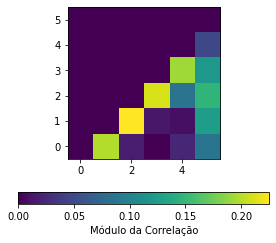

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
M=np.zeros((6,6))
for mov in (1,2,3,4,5,6,7,8,9,10,11,12,17,18,19,20,25,26,27,28,33,34,35,36,41,42,43,48,49,58,59,60,61,63,64):
     for f1 in range(0,6):
         for f2 in range(f1+1,6):
            #fazendo histograma
            plt.figure()
            plt.hist(corr[1:21,mov,f1,f2])
            plt.ylabel("Quantidade")
            plt.xlabel("Correlação")
            plt.title(f"Correlação:Movimento {mov} x Força {f1} x Força {f2}")
            plt.grid()
            plt.show()
              
            mediana=np.median(corr[1:21,mov,f1,f2])
            M[f1,f2]+=mediana

matriz=M/35 

#gráfico da matriz da correlação
plt.imshow(np.abs(matriz), origin = 'lower', cmap = 'viridis', interpolation = 'nearest')

cb = plt.colorbar(orientation = 'horizontal', shrink = .75)
cb.set_label('Módulo da Correlação')


plt.show()


